<a href="https://colab.research.google.com/github/GiovanniSoares/Courses/blob/main/5_Pandas_IO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes

In [ ]:
import pandas as pd

In [ ]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_f.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [ ]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_m.head()

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M


In [ ]:
print("Quantidade de nomes:" + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes:400


In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()

In [ ]:
nomes.sample(5)

,nome
162,ISMAEL
140,NEUZA
8,PATRICIA
62,VICTOR
181,IRACEMA


# Incluindo ID e Dominio dos alunos

In [ ]:
import numpy as np
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

400

In [ ]:
nomes["id_aluno"] = np.random.permutation(total_alunos) +1

In [ ]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [ ]:
dominios = ['@dominiodoemaik.com.br' , '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios,total_alunos)

In [ ]:
nomes.head()

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemaik.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominiodoemaik.com.br
4,ADRIANA,343,@servicodoemail.com


In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominiodoemaik.com.br,severino@dominiodoemaik.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominiodoemaik.com.br,iago@dominiodoemaik.com.br
10,SANDRA,174,@dominiodoemaik.com.br,sandra@dominiodoemaik.com.br
171,TERESINHA,45,@dominiodoemaik.com.br,teresinha@dominiodoemaik.com.br


# Criando a tabela Cursos

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos



In [ ]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [ ]:
cursos['id'] = cursos.index +1

In [ ]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos = cursos.set_index('id')

In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemaik.com.br,arthur@dominiodoemaik.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemaik.com.br,helena@dominiodoemaik.com.br
183,IRACI,8,@dominiodoemaik.com.br,iraci@dominiodoemaik.com.br
189,DALVA,137,@dominiodoemaik.com.br,dalva@dominiodoemaik.com.br


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemaik.com.br,milena@dominiodoemaik.com.br,2
183,IRACI,8,@dominiodoemaik.com.br,iraci@dominiodoemaik.com.br,1
10,LUIS,125,@dominiodoemaik.com.br,luis@dominiodoemaik.com.br,2
139,OSMAR,71,@dominiodoemaik.com.br,osmar@dominiodoemaik.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [ ]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


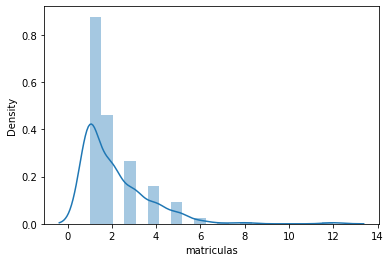

In [ ]:
sns = sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

# Selecionando Cursos

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
103,MAICON,295,@servicodoemail.com,maicon@servicodoemail.com,4
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
50,RAFAELA,27,@dominiodoemaik.com.br,rafaela@dominiodoemaik.com.br,3
171,TERESINHA,45,@dominiodoemaik.com.br,teresinha@dominiodoemaik.com.br,1
41,CLAUDIO,204,@servicodoemail.com,claudio@servicodoemail.com,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno' , 'id_curso'])

In [ ]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,43,6
2,304,16
3,304,18
4,304,11


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,77,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python
6,36,PHP com MySql
7,38,.NET para web
8,16,Novas integrações com Java
9,41,TDD com Java


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
9,ALINE,92,@dominiodoemaik.com.br,aline@dominiodoemaik.com.br,1
14,MARCELO,138,@dominiodoemaik.com.br,marcelo@dominiodoemaik.com.br,4
141,ORLANDO,159,@servicodoemail.com,orlando@servicodoemail.com,8
44,GERALDO,318,@dominiodoemaik.com.br,geraldo@dominiodoemaik.com.br,2
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,4


In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,43,6
2,304,16
3,304,18
4,304,11


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,77,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python


# Saída em diferentes formatos

In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,43,Lógica de programação
2,38,Java para Web
3,36,C# para Web


In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv').head()

,quantidade_de_alunos,nome_do_curso
0,43,Lógica de programação
1,38,Java para Web
2,36,C# para Web
3,71,Ruby on Rails
4,64,Cursos de Python


In [ ]:
matriculas_2 = matriculas_por_curso.to_json()

In [ ]:
mastriculas_json

'{"quantidade_de_alunos":{"1":43,"2":38,"3":36,"4":71,"5":64,"6":50,"7":2,"8":56,"9":35,"10":78,"11":24,"12":9,"13":78,"14":43,"15":28,"16":46,"17":61,"18":5,"19":34,"20":11},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>77</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>32</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>68</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>17</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>36</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>38</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>16</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>41</td>
 

In [ ]:
matriculas_por_curso.to_json('matriculas_json.json')

# Criando o banco SQL

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_curso.to_sql('matriculas' , engine)

In [ ]:
print(engine.table_names())

['matriculas']


# Buscando no banco SQL

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,4,Java para Web
1,5,17,Cursos de Python
2,8,16,Novas integrações com Java
3,13,17,Persistência com .NET
4,17,13,Internet das coisas


In [ ]:
pd.read_sql_table('matriculas' , engine , columns=['nome_do_curso' , 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,77
1,Java para Web,4
2,C# para Web,32
3,Ruby on Rails,68
4,Cursos de Python,17
5,PHP com MySql,36
6,.NET para web,38
7,Novas integrações com Java,16
8,TDD com Java,41
9,Código limpo com C#,67


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas' , engine , columns=['nome_do_curso' , 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,77
11,Hardware básico,87
14,Estatística básica,74
17,Boas práticas em Java,81


# Escrevendo no banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas' , con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da proxima turma

In [ ]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,77,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python
6,36,PHP com MySql
7,38,.NET para web
8,16,Novas integrações com Java
9,41,TDD com Java


In [ ]:
matriculas

,id_aluno,id_curso
0,235,19
1,43,6
2,304,16
3,304,18
4,304,11
...,...,...
849,323,7
850,323,11
851,383,11
852,366,1


In [ ]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}" .format(id_curso))
proxima_turma

,id_aluno,id_curso
2,304,16
21,174,16
25,218,16
38,347,16
41,163,16
...,...,...
813,48,16
819,114,16
837,84,16
845,99,16


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
16,EDUARDO,224,@dominiodoemaik.com.br,eduardo@dominiodoemaik.com.br,1
26,RITA,12,@dominiodoemaik.com.br,rita@dominiodoemaik.com.br,2
94,JAIR,344,@dominiodoemaik.com.br,jair@dominiodoemaik.com.br,1


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
6,16,CINTIA,@dominiodoemaik.com.br,cintia@dominiodoemaik.com.br,1
9,16,RENAN,@dominiodoemaik.com.br,renan@dominiodoemaik.com.br,3
12,16,RITA,@dominiodoemaik.com.br,rita@dominiodoemaik.com.br,2
17,16,WILLIAN,@servicodoemail.com,willian@servicodoemail.com,1
29,16,LUCAS,@servicodoemail.com,lucas@servicodoemail.com,2
...,...,...,...,...,...
380,16,ELZA,@dominiodoemaik.com.br,elza@dominiodoemaik.com.br,2
380,16,ELZA,@dominiodoemaik.com.br,elza@dominiodoemaik.com.br,2
386,16,YASMIN,@servicodoemail.com,yasmin@servicodoemail.com,2


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
6       CINTIA
9        RENAN
12        RITA
17     WILLIAN
29       LUCAS
        ...   
380       ELZA
380       ELZA
386     YASMIN
393      JOSUE
399     CICERA
Name: nome, Length: 74, dtype: object

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
6,CINTIA
9,RENAN
12,RITA
17,WILLIAN
29,LUCAS
...,...
380,ELZA
380,ELZA
386,YASMIN


In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso

In [ ]:
nome_curso

'Estatística básica'

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do Curso de {}' . format(nome_curso)})
proxima_turma

,Alunos do Curso de Estatística básica
id_aluno,
6,CINTIA
9,RENAN
12,RITA
17,WILLIAN
29,LUCAS
...,...
380,ELZA
380,ELZA
386,YASMIN


# Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx' , index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do Curso de Estatística básica
0,CINTIA
1,RENAN
2,RITA
3,WILLIAN
4,LUCAS
...,...
69,ELZA
70,ELZA
71,YASMIN
72,JOSUE
